In [7]:
from Handler.SequenceAnalysisHandler import SequenceAnalysisHandler
from Handler import utils
from Handler.OcclusionHandler import OcclusionHandler
from Handler.utils import MDEThresholdMode

In [8]:
mde_threshold_mode = MDEThresholdMode.MIN_UF_MAX
use_topography = True
fastloading = True
model = './DenseDepth/nyu.h5'
model = None
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 18})

### Paulusstraße

In [9]:
handler = OcclusionHandler(path_prefix="./FullPaulustr/", model=model)
seq = SequenceAnalysisHandler(handler)
evaluator_paul_sky = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)

100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


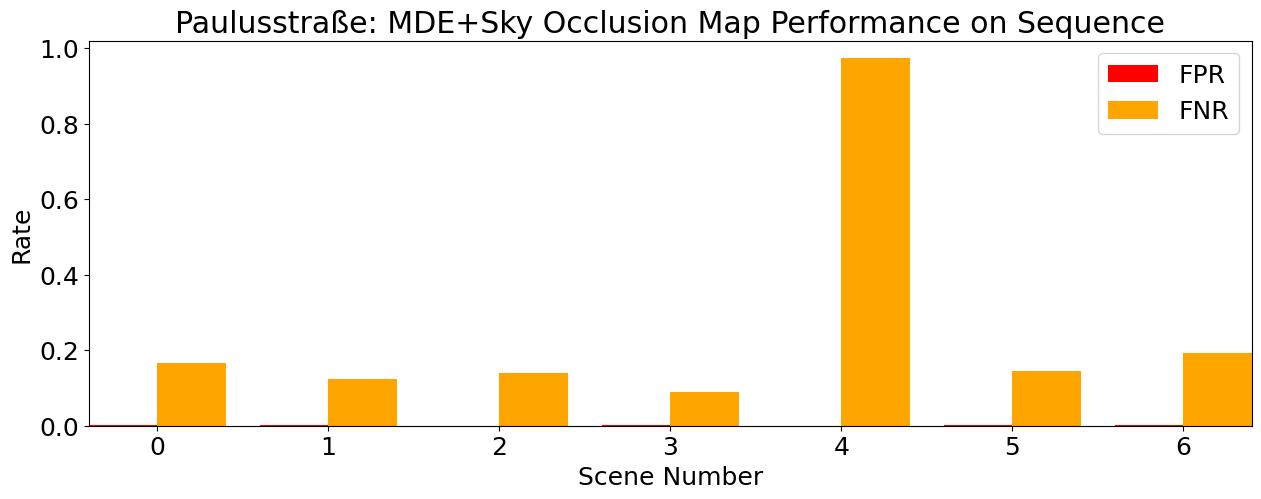

In [10]:
evaluator_paul_sky.plot_fprs_and_fnrs("Paulusstraße: MDE+Sky Occlusion Map Performance on Sequence")

### Informatikzentrum

In [11]:
handler = OcclusionHandler(path_prefix="./InformatikZentrum/", model=model)
seq = SequenceAnalysisHandler(handler)
evaluator_inf_sky = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)

100%|██████████| 29/29 [00:08<00:00,  3.48it/s]


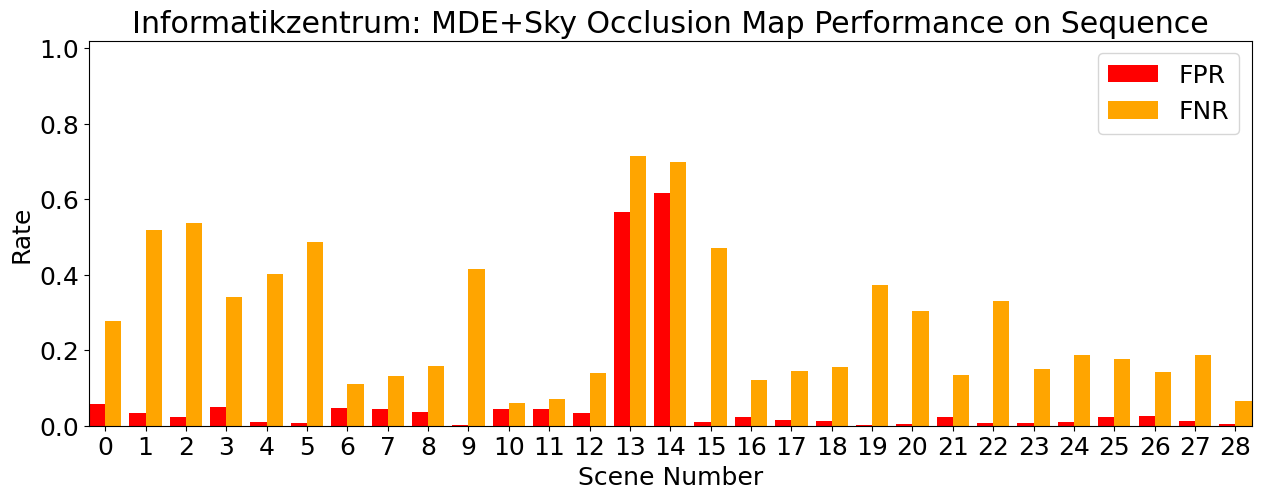

In [12]:
evaluator_inf_sky.plot_fprs_and_fnrs("Informatikzentrum: MDE+Sky Occlusion Map Performance on Sequence")

### Königshügel

In [13]:
handler = OcclusionHandler(path_prefix="./Koenigshuegel/", model=model)
seq = SequenceAnalysisHandler(handler)
evaluator_koen_sky = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)

100%|██████████| 13/13 [00:03<00:00,  3.30it/s]


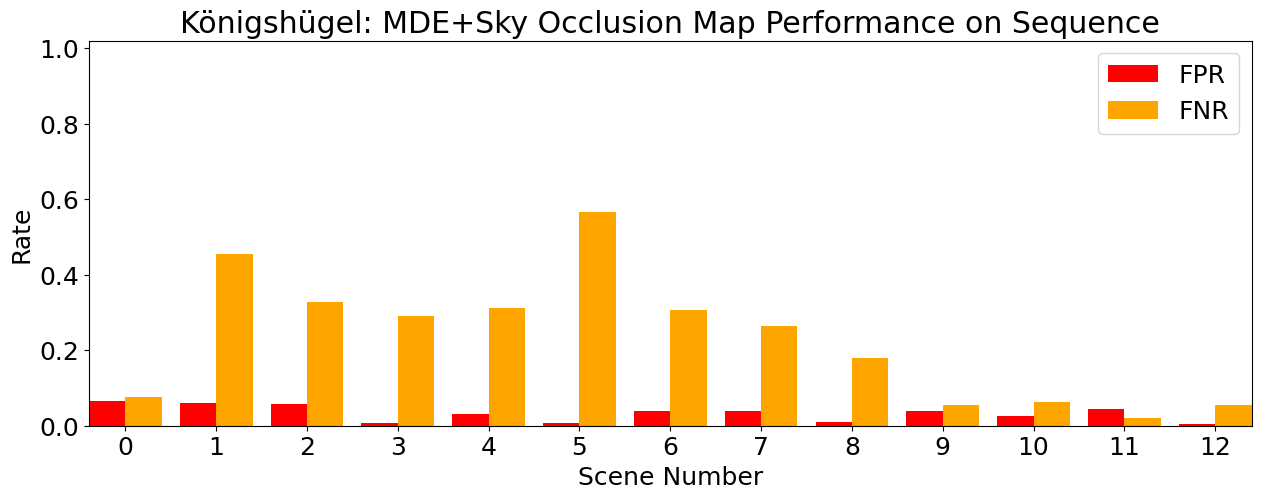

In [14]:
evaluator_koen_sky.plot_fprs_and_fnrs("Königshügel: MDE+Sky Occlusion Map Performance on Sequence")

### Lousberg

In [15]:
handler = OcclusionHandler(path_prefix="./Lousberg/", model=model)
seq = SequenceAnalysisHandler(handler, 0, 11)
evaluator_lous_sky = seq.analyze_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)

100%|██████████| 12/12 [00:03<00:00,  3.12it/s]


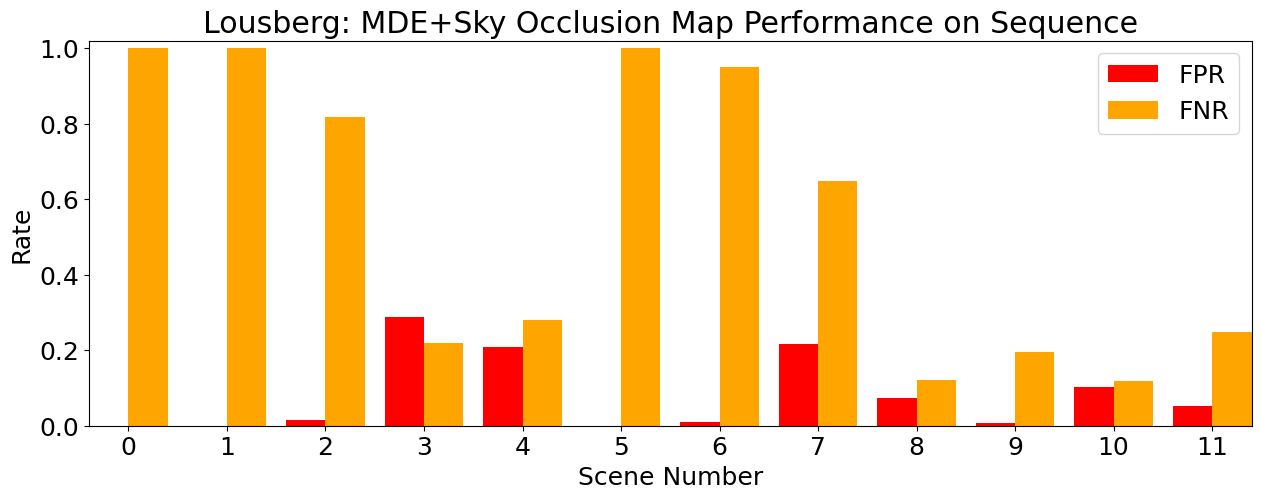

In [16]:
evaluator_lous_sky.plot_fprs_and_fnrs("Lousberg: MDE+Sky Occlusion Map Performance on Sequence")

# All FPR and FNR Eval

In [17]:
import numpy as np

mde = [[], []]
for eval in [evaluator_paul_sky, evaluator_inf_sky, evaluator_koen_sky, evaluator_lous_sky]:
    mde[0].extend(eval.fprs)
    mde[1].extend(eval.fnrs)
print(f'MDE FPR mean: {np.mean(mde[0])}, FNR mean: {np.mean(mde[1])}')

MDE FPR mean: 0.052692294093743576, FNR mean: 0.3183641235716681


# Exploration

100%|██████████| 12/12 [00:03<00:00,  3.81it/s]


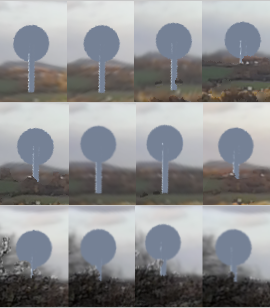

In [18]:
concat = seq.visualize_mde_sky_occlusion_sequence(MDEThresholdMode.MIN_UF_MAX, use_topography, fastloading)
utils.visualize_image(utils.concat_images_col(concat, n_cols=4))

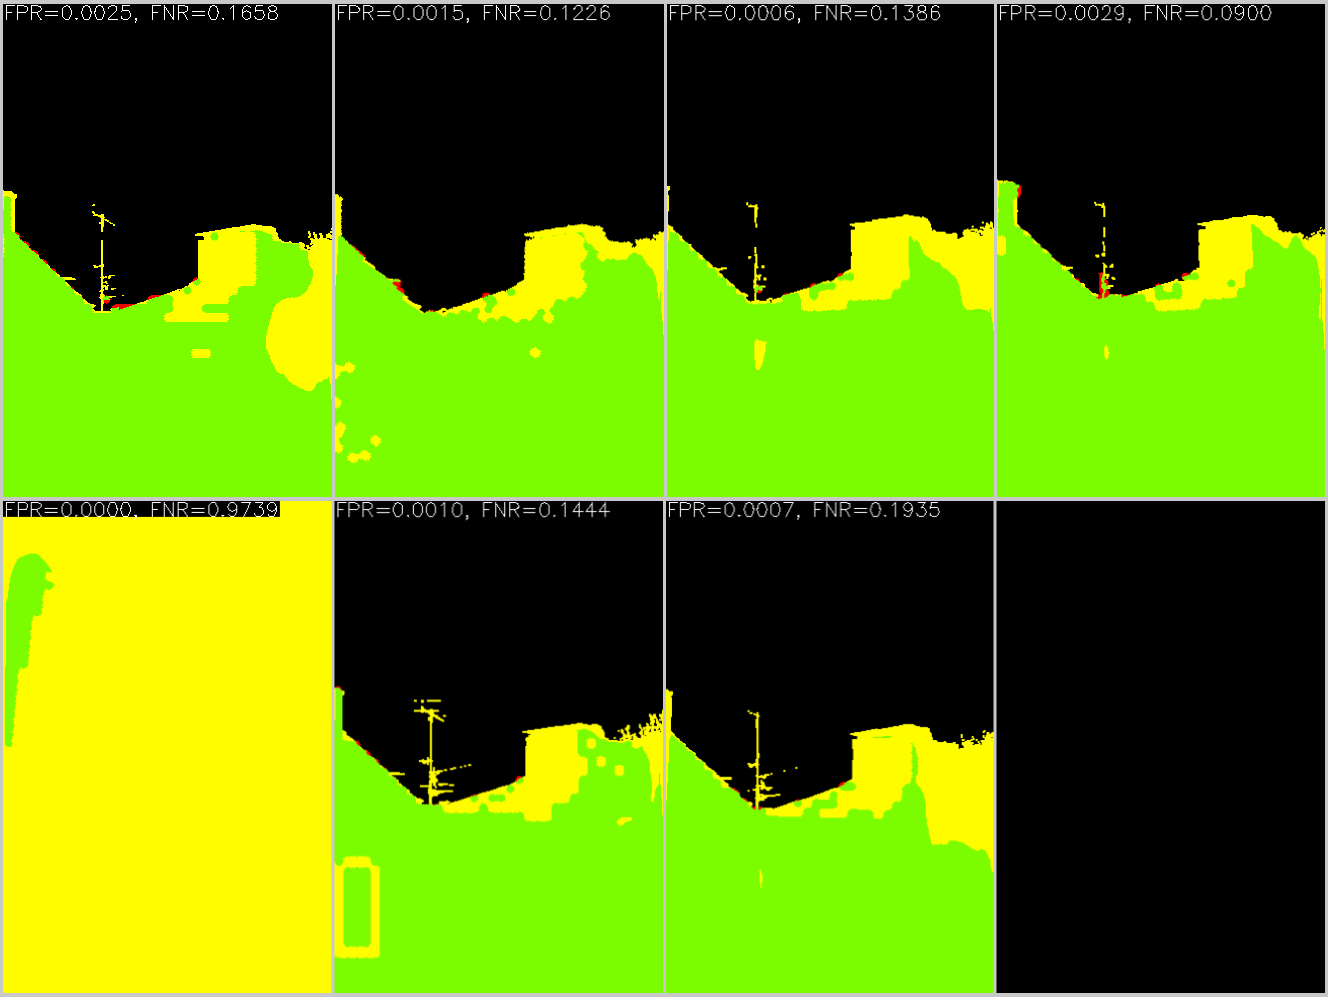

In [19]:
utils.visualize_image(evaluator_paul_sky.visualize_images(n_cols=4))

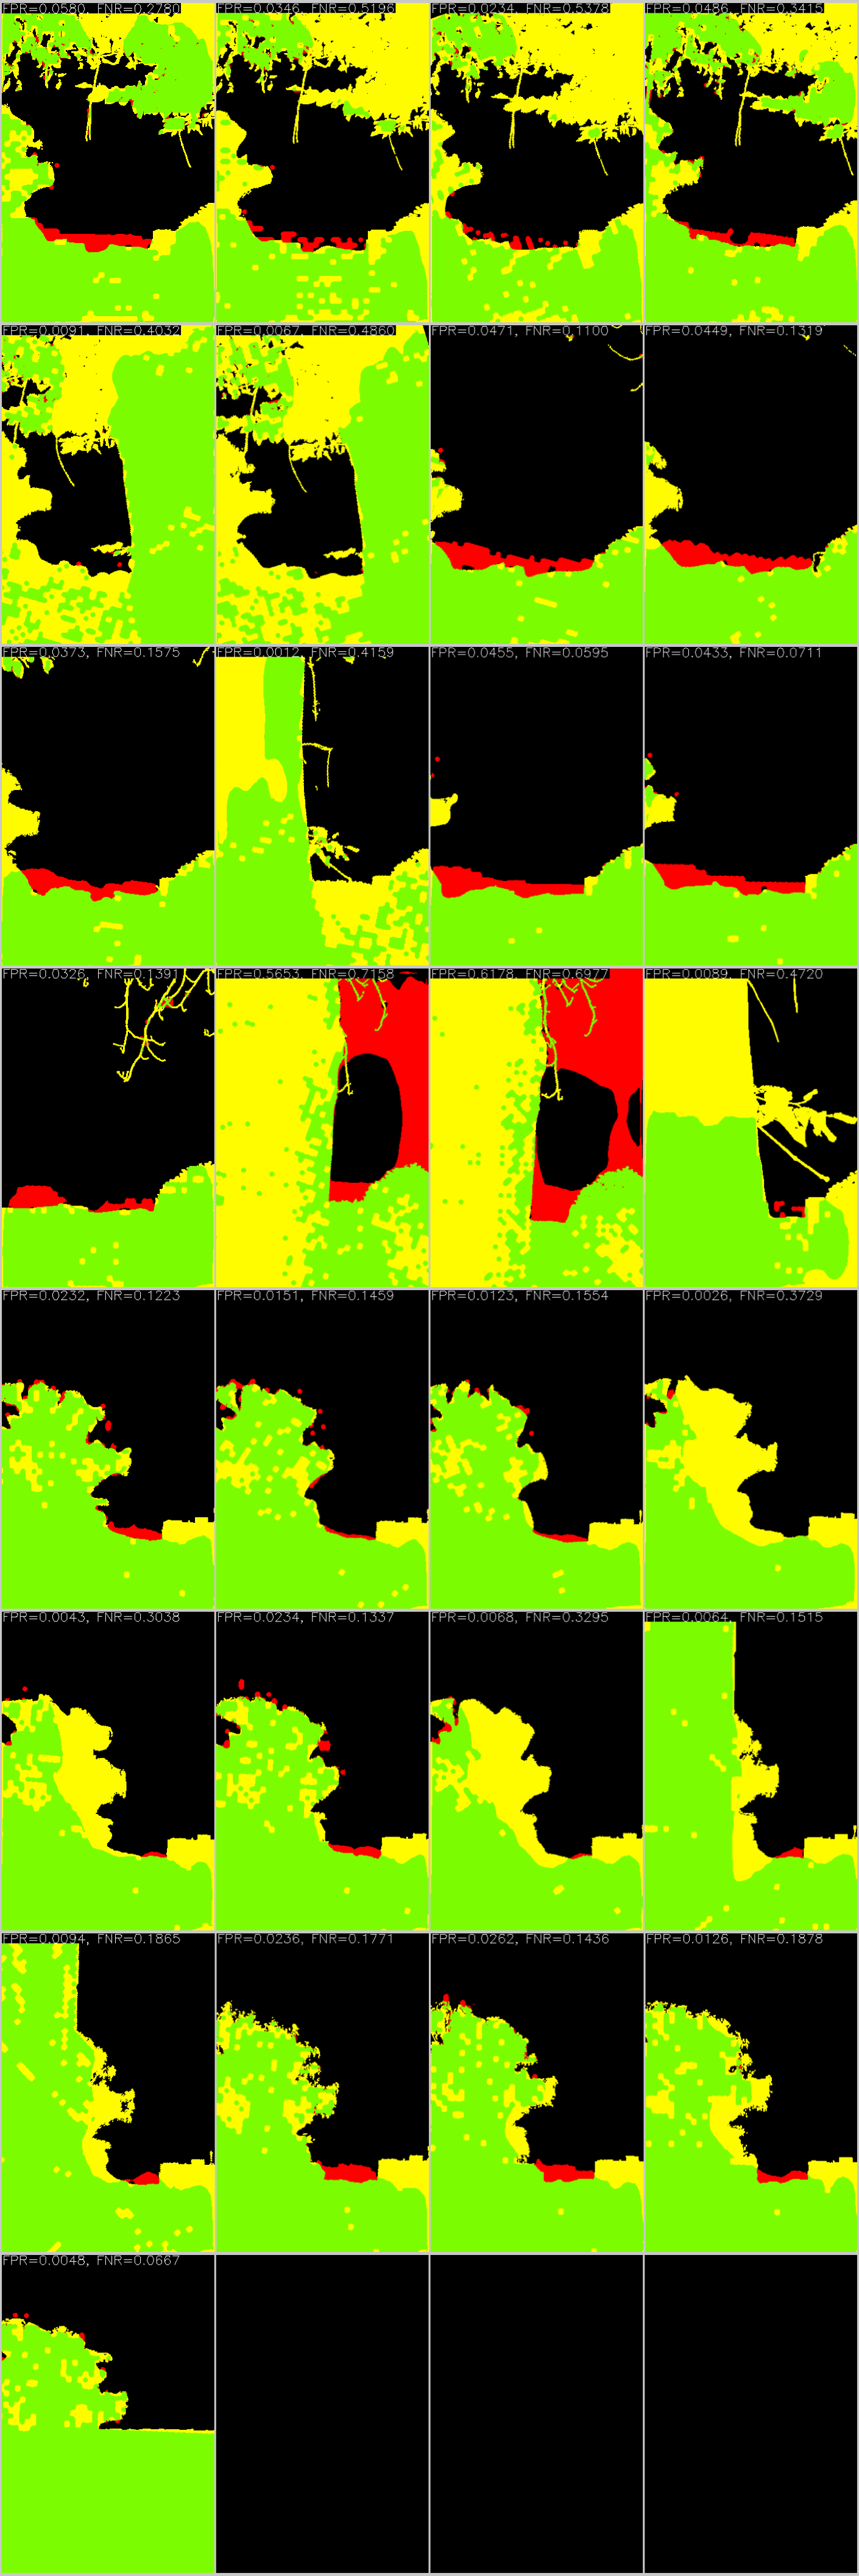

In [20]:
utils.visualize_image(evaluator_inf_sky.visualize_images(n_cols=4))

100%|██████████| 12/12 [00:03<00:00,  3.72it/s]


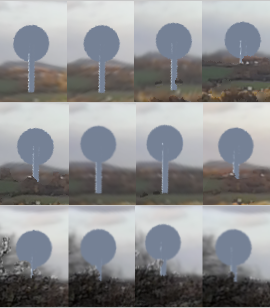

In [21]:
concat = seq.visualize_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
utils.visualize_image(utils.concat_images_col(concat, n_cols=4))

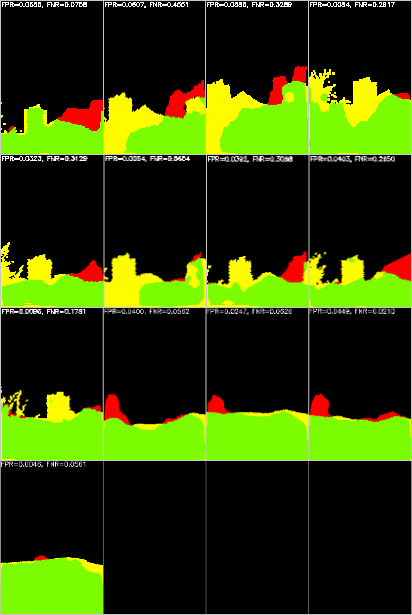

In [22]:
utils.visualize_image(evaluator_koen_sky.visualize_images(n_cols=4))

100%|██████████| 12/12 [00:03<00:00,  3.81it/s]


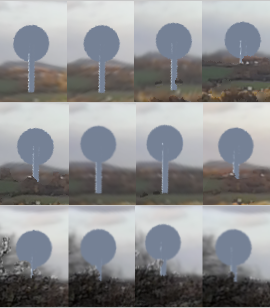

In [23]:
concat = seq.visualize_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
utils.visualize_image(utils.concat_images_col(concat, n_cols=4))

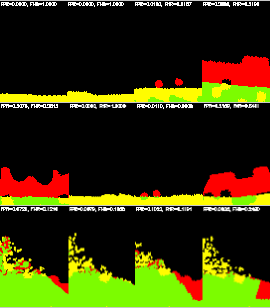

In [24]:
utils.visualize_image(evaluator_lous_sky.visualize_images(n_cols=4))

100%|██████████| 12/12 [00:03<00:00,  3.71it/s]


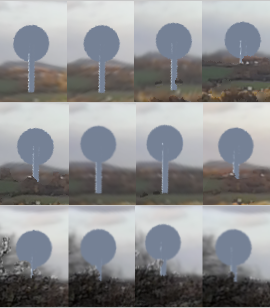

In [25]:
concat = seq.visualize_mde_sky_occlusion_sequence(mde_threshold_mode, use_topography, fastloading)
utils.visualize_image(utils.concat_images_col(concat, n_cols=4))

# MDE Pattern Evaluation

In [26]:
import glob
from Handler import utils
import numpy as np
import cv2

In [27]:
directories = ['./FullPaulustr/', './InformatikZentrum/', './Koenigshuegel/', './Lousberg/']
files = []
for dir in directories[0:1]:
    files.extend(glob.glob(f"{dir}*mde*.npy"))
files

['./FullPaulustr\\mde_0.npy',
 './FullPaulustr\\mde_1.npy',
 './FullPaulustr\\mde_2.npy',
 './FullPaulustr\\mde_3.npy',
 './FullPaulustr\\mde_4.npy',
 './FullPaulustr\\mde_5.npy',
 './FullPaulustr\\mde_6.npy']

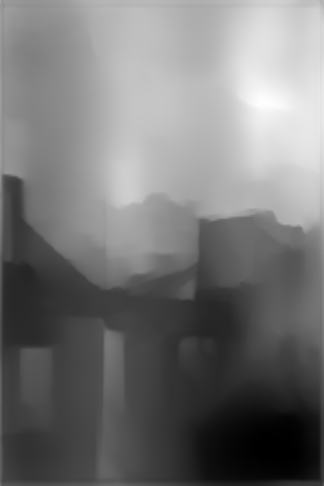

In [28]:

mean_image = None
for file in files[3:4]:
    mde_depth = np.load(file)
    rescaled = utils.rescale_depth_images(mde_depth)
    if mean_image is None:
        mean_image = rescaled
    else:
        rescaled = cv2.resize(rescaled, (mean_image.shape[1], mean_image.shape[0]))
        mean_image += rescaled
mean_image = mean_image / len(files)
utils.visualize_image(utils.rescale_depth_images(mean_image))

# def __compute_mde_depth_map(self, image, path_prefix, image_number, fastloading=False):
#     """Using the deep learning network to compute a mde depth map if none can be loaded from disk."""
#     if fastloading:
#         try:
#             return np.load(f"{path_prefix}mde_{image_number}.npy")
#         except FileNotFoundError:
#             pass
#     inputs = np.array([cv2.resize(image, (640, 480))]) / 255  # Adjust input image to fit model
#     output = predict(self.model, inputs)[0]
#     mde_depth_map = cv2.resize(output.astype(np.float32), (image.shape[1], image.shape[0]))  # Adjust output to fit background_cutout
#     # mde_depth_map = np.dstack((mde_depth_map, np.zeros((*mde_depth_map.shape[:2], 2))))
#     mde_depth_map = np.stack([mde_depth_map, mde_depth_map, mde_depth_map], axis=2)  # Adjust output to fit cv2
#     np.save(f"{path_prefix}mde_{image_number}.npy", mde_depth_map)
#     return mde_depth_map

In [29]:
def hand_get_mde_threshold(mde_depth_map, screen_image, sky_seg, sky_seg_set):
    """Use a User to set the threshold value by hand to visualize the maximum possible output result."""
    mde_depth = mde_depth_map[:, :, 0]
    window_name = "MDE Occlusion"
    cv2.namedWindow(window_name)
    mde_max = mde_depth.max()

    def on_trackbar(val):
        threshold = val / 100 * mde_max
        mask = mde_depth < threshold

        result = utils.draw_mask_on_image(screen_image, mask)
        cv2.imshow(window_name, result)

    cv2.createTrackbar('Threshold val/100*mde_max', window_name, 0, 100, on_trackbar)
    on_trackbar(0)
    cv2.waitKey()
    threshold = cv2.getTrackbarPos('Threshold val/100*mde_max', window_name) / 100 * mde_max
    cv2.destroyAllWindows()
    return threshold
hand_get_mde_threshold(utils.rescale_depth_images(mean_image), utils.rescale_depth_images(mean_image).astype(np.uint8), None, False)

45.9

In [30]:
utils.rescale_depth_images(mean_image)

array([[[168.0918  , 168.0918  , 168.0918  ],
        [150.50153 , 150.50153 , 150.50153 ],
        [146.42679 , 146.42679 , 146.42679 ],
        ...,
        [175.81337 , 175.81337 , 175.81337 ],
        [177.88885 , 177.88885 , 177.88885 ],
        [187.27742 , 187.27742 , 187.27742 ]],

       [[165.11044 , 165.11044 , 165.11044 ],
        [151.97964 , 151.97964 , 151.97964 ],
        [147.25621 , 147.25621 , 147.25621 ],
        ...,
        [177.26862 , 177.26862 , 177.26862 ],
        [178.93127 , 178.93127 , 178.93127 ],
        [185.83664 , 185.83664 , 185.83664 ]],

       [[158.9949  , 158.9949  , 158.9949  ],
        [155.01169 , 155.01169 , 155.01169 ],
        [148.95761 , 148.95761 , 148.95761 ],
        ...,
        [180.25377 , 180.25377 , 180.25377 ],
        [181.06958 , 181.06958 , 181.06958 ],
        [182.88112 , 182.88112 , 182.88112 ]],

       ...,

       [[104.23941 , 104.23941 , 104.23941 ],
        [ 92.14017 ,  92.14017 ,  92.14017 ],
        [ 81.381676,  

In [31]:
from keras.models import load_model
from DenseDepth.layers import BilinearUpSampling2D

model_path = "DenseDepth/nyu.h5"
# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')

# Load model into GPU / CPU
model = load_model(model_path, custom_objects=custom_objects, compile=False)

print('\nModel loaded ({0}).'.format(model))

Loading model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Model loaded (<tensorflow.python.keras.engine.functional.Functional object at 0x000001D196A3CB20>).


In [32]:
from DenseDepth.utils import predict

test_black = np.zeros((480, 640, 3))
test_white = np.ones((480, 640, 3)) * 255
test_rand = np.random.randint(0, 255, (480, 640, 3))

image = test_rand

inputs = np.array([image]) / 255  # Adjust input image to fit model
output = predict(model, inputs)[0]
mde_depth_map = cv2.resize(output.astype(np.float32), (image.shape[1], image.shape[0]))  # Adjust output to fit background_cutout
# mde_depth_map = np.dstack((mde_depth_map, np.zeros((*mde_depth_map.shape[:2], 2))))
mde_depth_map = np.stack([mde_depth_map, mde_depth_map, mde_depth_map], axis=2)  # Adjust output to fit cv2

In [33]:
# white_depth = mde_depth_map
# black_depth = mde_depth_map
rand_depth = mde_depth_map

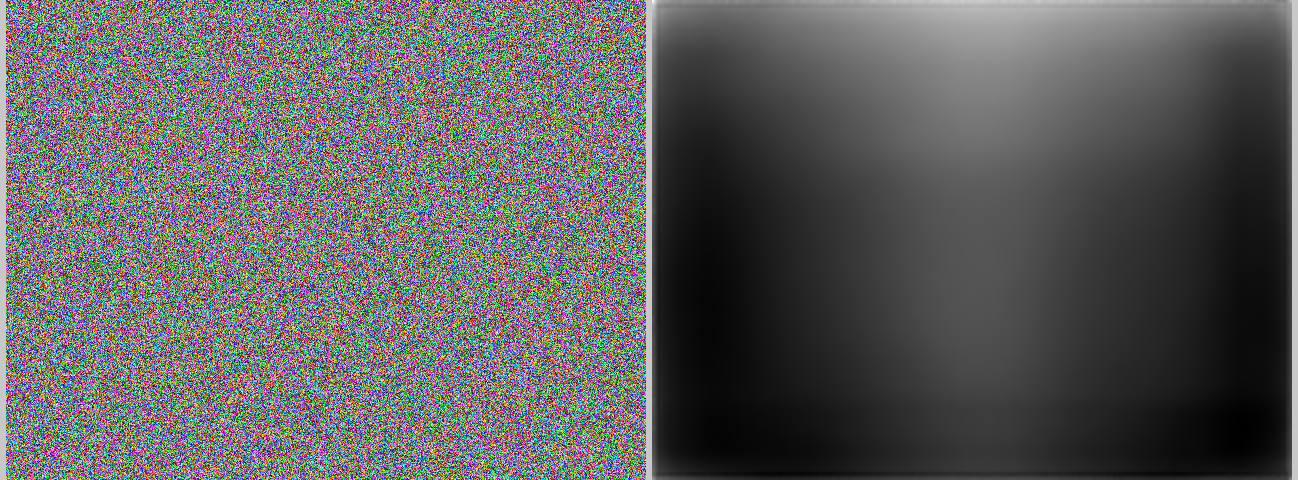

In [34]:
from Handler.utils import ConcatMode

utils.visualize_image(utils.concat_images([test_rand, utils.rescale_depth_images(rand_depth)], mode=ConcatMode.HORIZONTAL))